In [6]:
### The following codes run in Python 2.7

from newsapi import NewsApiClient
import pandas as pd
from datetime import datetime, timedelta

In [31]:
api = NewsApiClient(api_key='3XXXXXXXXXXXXXXXXXXXXXXXXXa')# Here input the api, it can be obtained from https://newsapi.org/

In [35]:
def daterange(start_date, end_date):
    delta = timedelta(days=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
date_start=pd.to_datetime('2018-09-28')  # start date of search 
date_end=pd.to_datetime('2018-10-29')    # end date of search 
datetime_ls=list(daterange(date_start,date_end))
date_ls=[str(j)[0:10] for j in datetime_ls]
date_ls

['2018-09-28',
 '2018-09-29',
 '2018-09-30',
 '2018-10-01',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-05',
 '2018-10-06',
 '2018-10-07',
 '2018-10-08',
 '2018-10-09',
 '2018-10-10',
 '2018-10-11',
 '2018-10-12',
 '2018-10-13',
 '2018-10-14',
 '2018-10-15',
 '2018-10-16',
 '2018-10-17',
 '2018-10-18',
 '2018-10-19',
 '2018-10-20',
 '2018-10-21',
 '2018-10-22',
 '2018-10-23',
 '2018-10-24',
 '2018-10-25',
 '2018-10-26',
 '2018-10-27',
 '2018-10-28']

In [57]:
len(date_ls)

31

In [37]:
news_ls=[]
for date_str in date_ls:
    news_midterm=api.get_everything(q='midterm election',from_param = date_str,to = date_str)
    article_dic=news_midterm['articles']
    df_day=pd.DataFrame(article_dic)
    news_ls.append(df_day)

In [38]:
 df=pd.concat(news_ls)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 19
Data columns (total 8 columns):
author         507 non-null object
content        612 non-null object
description    619 non-null object
publishedAt    620 non-null object
source         620 non-null object
title          620 non-null object
url            620 non-null object
urlToImage     610 non-null object
dtypes: object(8)
memory usage: 43.6+ KB


In [40]:
df.head(21)

,author,content,description,publishedAt,source,title,url,urlToImage
0,Kris Holt,The November hearing will cover issues includi...,Google CEO Sundar Pichai will testify before t...,2018-09-28T18:57:00Z,"{'id': 'engadget', 'name': 'Engadget'}",Google’s CEO will testify before Congress abou...,https://www.engadget.com/2018/09/28/google-ceo...,https://o.aolcdn.com/images/dims?thumbnail=120...
1,EMILY YELLIN,I have heard that for every person who talks a...,"On Thursday, Christine Blasey Ford was the voi...",2018-09-28T01:48:39Z,"{'id': 'the-new-york-times', 'name': 'The New ...",Watching Her Speak for Us All,https://www.nytimes.com/2018/09/27/opinion/bla...,https://static01.nyt.com/images/2018/09/27/opi...
2,None,President Trump on Friday signed a massive spe...,Washington Post Trump signs bill that averts g...,2018-09-28T17:17:16Z,"{'id': 'the-washington-post', 'name': 'The Was...",Trump signs bill that averts government shutdo...,https://www.washingtonpost.com/business/econom...,https://www.washingtonpost.com/resizer/owR9MSO...
3,TIME Staff,Three TIME journalists will take part in the 2...,TIME journalists will attend the 2018 Texas Tr...,2018-09-28T15:50:28Z,"{'id': 'time', 'name': 'Time'}",TIME Journalists Are Heading to Austin for the...,http://time.com/5409951/time-texas-tribune-fes...,https://timedotcom.files.wordpress.com/2018/08...
4,The Associated Press,The two countries that the United States has a...,The two countries will take turns at the podiu...,2018-09-28T07:16:23Z,"{'id': 'abc-news', 'name': 'ABC News'}","China, Russia take their turn at the UN",https://abcnews.go.com/US/wireStory/china-russ...,https://s.abcnews.com/images/US/WireAP_cfc88fa...
5,"Associated Press, Marcy Gordon, Associated Press",The facade of the Capitol building in Washingt...,Legislation to be voted on Friday would make t...,2018-09-28T00:53:47Z,"{'id': 'usa-today', 'name': 'USA Today'}","House approves GOP tax measures for savings, s...",https://www.usatoday.com/story/news/politics/2...,https://www.gannett-cdn.com/-mm-/8fcc3d3e30642...
6,"USA TODAY, Jessica Guynn, USA TODAY","Google CEO Sundar Pichai, seen here delivering...",The agreement was reached during a private aud...,2018-09-28T18:51:47Z,"{'id': 'usa-today', 'name': 'USA Today'}",Google CEO Sundar Pichai to testify before Con...,https://www.usatoday.com/story/tech/2018/09/28...,https://www.gannett-cdn.com/-mm-/8561554c31de4...
7,Kurt Wagner,Hackers may have accessed as many as 50 millio...,Another security blunder for Facebook — this t...,2018-09-28T17:20:50Z,"{'id': 'recode', 'name': 'Recode'}",Hackers may have accessed 50 million Facebook ...,https://www.recode.net/2018/9/28/17914538/face...,https://cdn.vox-cdn.com/thumbor/1fgo4pRreu3iXP...
8,None,The fate of Donald Trumps nominee for the Supr...,The fate of Donald Trump’s nominee for the Sup...,2018-09-28T07:49:00Z,"{'id': None, 'name': 'Yahoo.com'}",Trump stands by Brett Kavanaugh despite allege...,https://www.yahoo.com/news/brett-kavanaugh-sup...,https://s.yimg.com/uu/api/res/1.2/3lv_X2rdZQik...
9,Shaun Nichols,Hackers probing America's electronic voting sy...,Good thing Congress has been so forceful in im...,2018-09-28T01:04:09Z,"{'id': None, 'name': 'Theregister.co.uk'}",The DEF CON hackers' report on US voting machi...,https://www.theregister.co.uk/2018/09/28/defco...,https://regmedia.co.uk/2017/04/12/voting_shutt...


In [42]:
raw_data_csv = 'raw_news_data.csv'
df.to_csv(raw_data_csv, index=False)

In [43]:
#get the medium name
df['source']=df['source'].apply(lambda x: x['name'])

In [44]:
df.drop_duplicates(keep=False, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Data columns (total 9 columns):
index          620 non-null int64
author         507 non-null object
content        612 non-null object
description    619 non-null object
publishedAt    620 non-null object
source         620 non-null object
title          620 non-null object
url            620 non-null object
urlToImage     610 non-null object
dtypes: int64(1), object(8)
memory usage: 48.4+ KB


In [46]:
df['source'].value_counts()

Yahoo.com                  82
USA Today                  44
The Guardian (AU)          33
The New York Times         31
Time                       26
The Washington Post        22
Politico                   22
The Huffington Post        18
Business Insider           18
Marketwatch.com            16
Slate.com                  14
Mashable                   13
Reuters                    13
CNN                        12
ABC News                   10
Boingboing.net             10
Cnet.com                   10
Theatlantic.com             9
Washingtonexaminer.com      8
Thinkprogress.org           8
Gizmodo.com                 6
Forbes.com                  6
Al Jazeera English          5
Engadget                    5
The Wall Street Journal     5
Npr.org                     5
Sfgate.com                  4
Bustle.com                  4
Fastcompany.com             4
Financial Times             4
                           ..
Ritholtz.com                1
Ars Technica                1
Lmtonline.

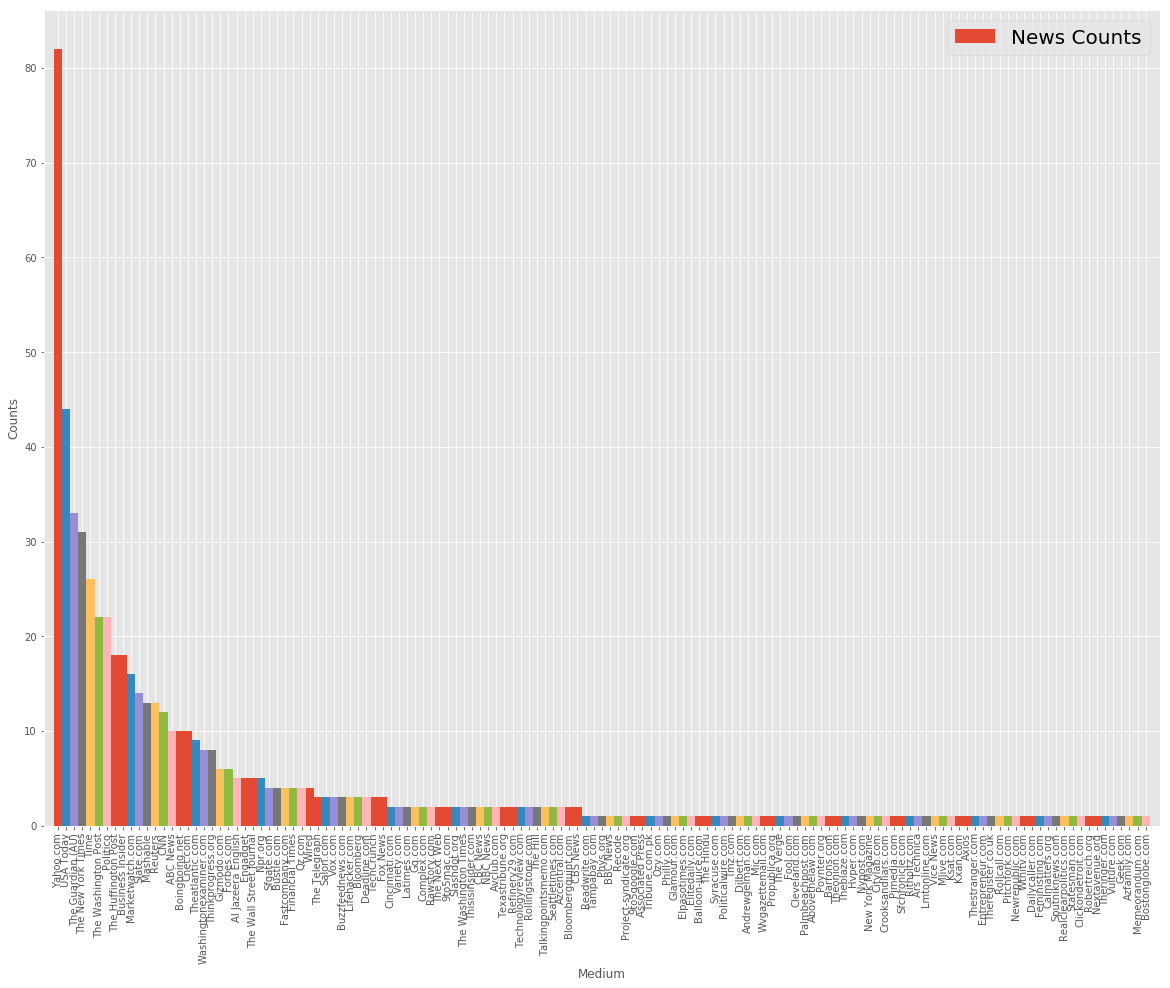

In [58]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot how many news related to midterm election reported by each medium over past 31 days
h=df['source'].value_counts().plot(kind='bar', align='center',label='publisher',width=1,figsize=(20,15))
x0, x1 = h.get_xlim()
h.set_xlim(x0 -1, x1 + 1)
h.legend(['News Counts'],loc='best', fontsize=20)
plt.xlabel('Medium', fontdict=None, labelpad=None)
plt.ylabel('Counts', fontdict=None, labelpad=None)
h.tick_params(axis = 'both',labelsize = 10)
plt.savefig('News_counts.pdf')

In [48]:
df['time_of_publish']=pd.to_datetime(df['publishedAt'])

In [49]:
df['date_of_publish']=df['time_of_publish'].dt.date

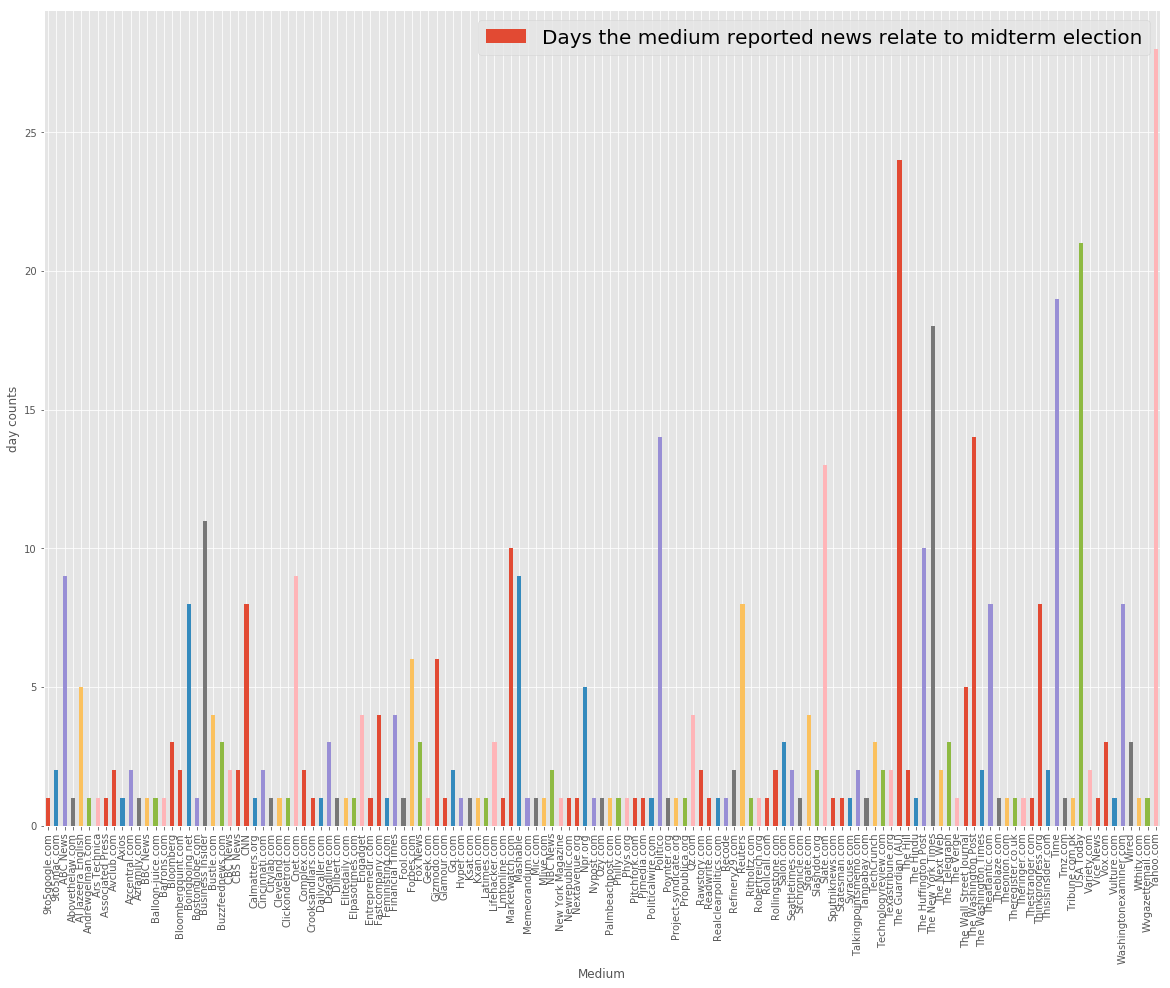

In [55]:
f=df[['source','date_of_publish']].groupby(['source'])['date_of_publish'].nunique().plot.bar(align='center',figsize=(20,15))
f.legend(['Days the medium reported news relate to midterm election'],loc='best', fontsize=20)
plt.xlabel('Medium', fontdict=None, labelpad=None)
plt.ylabel('day counts', fontdict=None, labelpad=None)
f.tick_params(axis = 'both',labelsize = 10)
plt.savefig('News_counts_2.pdf')

In [270]:
df_[['source','date_of_publish']].groupby(['date_of_publish']).nunique()

,source,date_of_publish
date_of_publish,,
2018-09-28,16,1
2018-09-29,18,1
2018-09-30,17,1
2018-10-01,16,1
2018-10-02,14,1
2018-10-03,16,1
2018-10-04,14,1
2018-10-05,16,1
2018-10-06,18,1


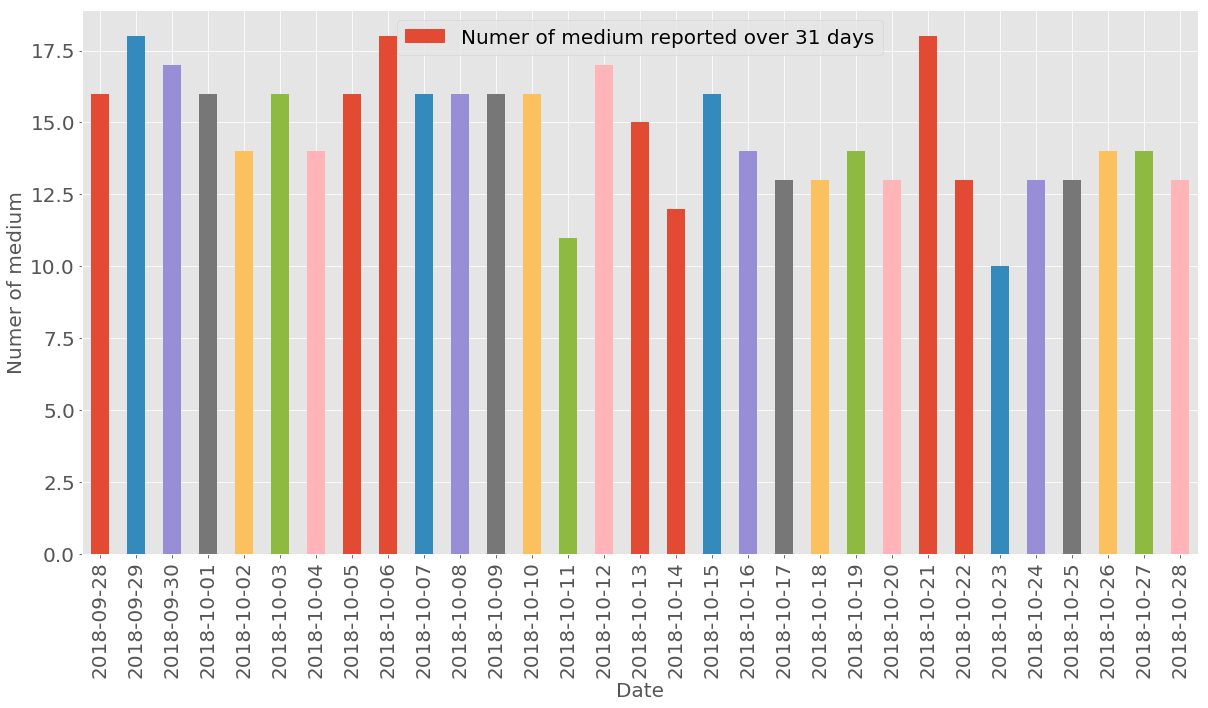

In [60]:
# this plot shows on each day how many different mediums reported news related to midterm election

f2=df[['source','date_of_publish']].groupby(['date_of_publish'])['source'].nunique().plot.bar(align='center',figsize=(20,10))
f2.legend(['Numer of medium reported over 31 days'],loc='best', fontsize=20)
plt.xlabel('Date', fontdict=None, labelpad=None, fontsize=20)
plt.ylabel('Numer of medium', fontdict=None, labelpad=None,fontsize=20)
f2.tick_params(axis = 'both',labelsize = 20)
plt.savefig('News_counts_3.png')